# About: Deep Learning '23 Assignment 1


We will perform Image Classification task on the MNIST dataset which has 70,000 28*28 images labelled into 10 classes. 

**Total Marks: 60**


**Fill these**

Name: Abhishek Garg

Roll Number: 22BM6JP03

**Instructions:**

1. We have left code cells blank for you to fill up with appropriate code. Do not add any extra code cells. Strictly follow the format and fill up the cells with the correct code. Refer to cell comments for what to fill in that cell.

2. *Do not* use any training frameworks like PyTorch Lightning. This assignment will test your ability to write custom training loops.

3. Save the notebook with cell outputs of all cells. The cell outputs  will be used for evaluating your submission.




In [148]:
import torch
import torch.nn as nn
import random
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader


## Add any other imports here

In [149]:
SEED=42
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

## Getting the data

In [150]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
train, val = random_split(train_data, [50000, 10000], generator=torch.Generator().manual_seed(SEED))

train_loader = DataLoader(train, batch_size=64, shuffle=True)
val_loader = DataLoader(val, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

train_len = len(train)
val_len= len(val)
test_len =len(test_data)
print(len(train), len(val), len(test_data))

50000 10000 10000


## Defining the Model [18 marks]

You will define 3 models, with 2, 3, 4 hidden layers respectively. Lets call these models A, B, C. We will be studying the comparitive performance of these 3 models on this task.

Use ReLU as the activation function for all three models. Later we will experiment with other activation functions as well.

### Model A

Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Output Layer (Dimension Size = Number of Classes = 10)

In [57]:
# Model A Definition 
class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, data_input, H1_output, H2_output, Data_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(data_input, H1_output)
        self.linear2 = nn.Linear(H1_output, H2_output)
        self.linear3 = nn.Linear(H2_output, Data_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        #x= torch.sigmoid(x)
        return x


# Fill in appropriately while maintaining the name of the variable
data_input= 28*28
H1_output= 64
H2_output=128
Data_out= 10

### Model B


Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Output Layer (Dimension Size = Number of Classes = 10)

In [63]:
# Model B Definiton

class NetRelu(nn.Module):
  
  # Constructor
  def __init__(self, data_input, H1_output, H2_output, H3_output, Data_out):
      super(NetRelu, self).__init__()
      self.linear1 = nn.Linear(data_input, H1_output)
      self.linear2 = nn.Linear(H1_output, H2_output)
      self.linear3 = nn.Linear(H2_output, H3_output)
      self.linear4 = nn.Linear(H3_output, Data_out)
  
  # Prediction
  def forward(self, x):
      x = torch.relu(self.linear1(x))  
      x = torch.relu(self.linear2(x))
      x = torch.relu(self.linear3(x))
      x = self.linear4(x)
      #x= torch.sigmoid(x)
      return x

# Use the same variable name
data_input= 28*28
H1_output= 64
H2_output=128
H3_output= 256
Data_out= 10
#modelB = NetRelu(28*28,64,128,256,10)

### Model C


Architecture

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Hidden Layer (Dimension Size - 512)
9. Activation Function
10. Output Layer (Dimension Size = Number of Classes = 10)

In [69]:
# Model C Definition
class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, data_input, H1_output, H2_output, H3_output,H4_output, Data_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(data_input, H1_output)
        self.linear2 = nn.Linear(H1_output, H2_output)
        self.linear3 = nn.Linear(H2_output, H3_output)
        self.linear4 = nn.Linear(H3_output, H4_output)
        self.linear5 = nn.Linear(H4_output, Data_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = torch.relu(self.linear2(x))
        x = torch.relu(self.linear3(x))
        x = torch.relu(self.linear4(x))
        x = self.linear5(x)
        #x= torch.sigmoid(x)
        return x

# Use the same variable name
data_input= 28*28
H1_output= 64
H2_output=128
H3_output= 256
H4_output= 512
Data_out= 10
#modelC = NetRelu(28*28,64,128,256,512,10)

## Loss Function & Optimizer [2 marks]

* Loss Function: Cross Entropy Loss
* Optimizer : Adam

Use PyTorch Library versions for these two.

In [105]:
# Use the same variable names
criterion = nn.CrossEntropyLoss()
learning_rate = 0.05
optimizer = torch.optim.Adam(modelA.parameters(), lr=learning_rate)

## Training Loop [30 marks]

We give you the freedom to choose Hyperparameters like learing rate, number of epochs etc, but take care to use the **same** hyperparameters for all the 3 models. Also clearly state the hyperparameters you have chosen

For each model, You need to report these metrics: Train Loss, Val Loss, Train Accuracy, Val Accuracy at the end of each epoch.

Also plot the graphs of the following (in separate cells)
1. Train Loss & Val Loss V/s Epoch
2. Train Accuracy & Val Accuracy V/s Epoch

In [106]:
# Define the hyperparameters (same for all 3 models) here
num_epochs= 10


### Model A 



In [151]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs):
    i = 0
    metrics = {'training_loss': [], 'validation_loss': [], 
               'training_accuracy': [], 'validation_accuracy': []}
    
    epoch_losses_train =[]
    epoch_losses_valid =[] 
    iteration_valid_losses=[]
    
    for epoch in range(epochs):
        runningLoss=0
        t_correct= 0
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            runningLoss += loss.item()
        metrics['training_loss'].append(runningLoss / len(train_loader))        
        epoch_losses_train.append(runningLoss / len(train_loader))
  
        runningLossValid= 0
        with torch.no_grad():
           for i, (inputs, labels) in enumerate(val_loader):
               outputs = model(inputs.view(-1, 28 * 28))
               loss = criterion(outputs, labels)
               runningLossValid += loss.item()
               iteration_valid_losses.append(loss.item())
           epoch_losses_valid.append(runningLossValid / len(val_loader))
           metrics['validation_loss'].append(runningLossValid / len(val_loader))
        
        with torch.no_grad():
          correct = 0
          for x, y in train_loader:
              z = model(x.view(-1, 28 * 28))
              _, label = torch.max(z, 1)
              correct += (label == y).sum().item()
          accuracy = 100 * (correct / train_len)
          metrics['training_accuracy'].append(accuracy)

          with torch.no_grad():
              t_correct = 0
              for x, y in val_loader:
                  z = model(x.view(-1, 28 * 28))
                  _, label = torch.max(z, 1)
                  t_correct += (label == y).sum().item()
          
              accuracy1 = 100 * (t_correct / val_len)
              metrics['validation_accuracy'].append(accuracy1)
          
        print(f"Epoch {epoch:3}. Training Loss: {epoch_losses_train[-1]:.6f},  Validation Loss: {epoch_losses_valid[-1]:.6f}")
        print(f"Training Accuracy: {correct} / {train_len} [{100 * correct / train_len:.2f}%], Validation Accuracy: {t_correct} / {val_len} [{100 * t_correct / val_len:.2f}%]")    
    
    return metrics

In [60]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.005
modelRelu = NetRelu(data_input, H1_output, H2_output, Data_out)
optimizer = torch.optim.Adam(modelRelu.parameters(), lr=learning_rate)
train_val_result = train(modelRelu, criterion, train_loader, test_loader, optimizer, epochs=num_epochs)

Epoch   0. Training Loss: 0.256671,  Validation Loss: 0.164772
Training Accuracy: 48061 / 50000 [96.12%], Validation Accuracy: 9520 / 10000 [95.20%]
Epoch   1. Training Loss: 0.126679,  Validation Loss: 0.142488
Training Accuracy: 48423 / 50000 [96.85%], Validation Accuracy: 9578 / 10000 [95.78%]
Epoch   2. Training Loss: 0.103266,  Validation Loss: 0.128193
Training Accuracy: 48737 / 50000 [97.47%], Validation Accuracy: 9632 / 10000 [96.32%]
Epoch   3. Training Loss: 0.083942,  Validation Loss: 0.124525
Training Accuracy: 49019 / 50000 [98.04%], Validation Accuracy: 9636 / 10000 [96.36%]
Epoch   4. Training Loss: 0.073842,  Validation Loss: 0.130366
Training Accuracy: 49074 / 50000 [98.15%], Validation Accuracy: 9664 / 10000 [96.64%]
Epoch   5. Training Loss: 0.066263,  Validation Loss: 0.131184
Training Accuracy: 49220 / 50000 [98.44%], Validation Accuracy: 9673 / 10000 [96.73%]
Epoch   6. Training Loss: 0.062103,  Validation Loss: 0.147728
Training Accuracy: 49055 / 50000 [98.11%], 

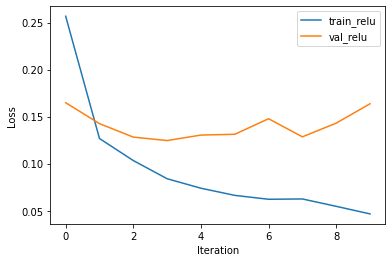

In [61]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model A
plt.plot(train_val_result['training_loss'], label = 'train_relu') 
plt.plot(train_val_result['validation_loss'], label = 'val_relu')
plt.ylabel('Loss')
plt.xlabel('Iteration')   
plt.legend()

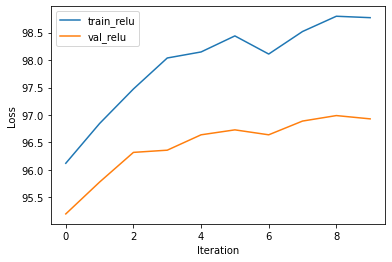

In [62]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model A
plt.plot(train_val_result['training_accuracy'], label = 'train_relu') 
plt.plot(train_val_result['validation_accuracy'], label = 'val_relu')
plt.ylabel('Loss')
plt.xlabel('Iteration')   
plt.legend()

### Model B


In [65]:
# Training Loop for model B

criterion = nn.CrossEntropyLoss()
learning_rate = 0.005
modelRelu = NetRelu(data_input, H1_output, H2_output,H3_output, Data_out)
optimizer = torch.optim.Adam(modelRelu.parameters(), lr=learning_rate)
train_val_result = train(modelRelu, criterion, train_loader, test_loader, optimizer, epochs=num_epochs)

Epoch   0. Training Loss: 0.286363,  Validation Loss: 0.180666
Training Accuracy: 47847 / 50000 [95.69%], Validation Accuracy: 9498 / 10000 [94.98%]
Epoch   1. Training Loss: 0.144846,  Validation Loss: 0.147810
Training Accuracy: 48397 / 50000 [96.79%], Validation Accuracy: 9588 / 10000 [95.88%]
Epoch   2. Training Loss: 0.112076,  Validation Loss: 0.141214
Training Accuracy: 48676 / 50000 [97.35%], Validation Accuracy: 9610 / 10000 [96.10%]
Epoch   3. Training Loss: 0.101335,  Validation Loss: 0.161176
Training Accuracy: 48543 / 50000 [97.09%], Validation Accuracy: 9575 / 10000 [95.75%]
Epoch   4. Training Loss: 0.085773,  Validation Loss: 0.154292
Training Accuracy: 48869 / 50000 [97.74%], Validation Accuracy: 9614 / 10000 [96.14%]
Epoch   5. Training Loss: 0.083708,  Validation Loss: 0.152495
Training Accuracy: 49022 / 50000 [98.04%], Validation Accuracy: 9641 / 10000 [96.41%]
Epoch   6. Training Loss: 0.079900,  Validation Loss: 0.148055
Training Accuracy: 49067 / 50000 [98.13%], 

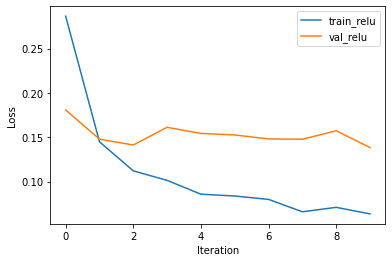

In [66]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model B
plt.plot(train_val_result['training_loss'], label = 'train_relu') 
plt.plot(train_val_result['validation_loss'], label = 'val_relu')
plt.ylabel('Loss')
plt.xlabel('Iteration')   
plt.legend()

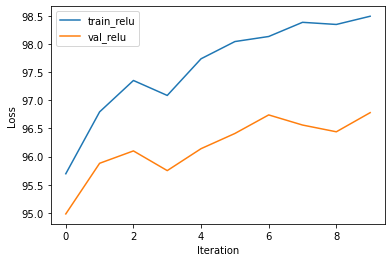

In [67]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model B
plt.plot(train_val_result['training_accuracy'], label = 'train_relu') 
plt.plot(train_val_result['validation_accuracy'], label = 'val_relu')
plt.ylabel('Loss')
plt.xlabel('Iteration')   
plt.legend()

### Model C


In [71]:
# Training Loop for model C

criterion = nn.CrossEntropyLoss()
learning_rate = 0.005
modelRelu = NetRelu(data_input, H1_output, H2_output,H3_output,H4_output, Data_out)
optimizer = torch.optim.Adam(modelRelu.parameters(), lr=learning_rate)
train_val_result = train(modelRelu, criterion, train_loader, test_loader, optimizer, epochs=num_epochs)

Epoch   0. Training Loss: 0.328034,  Validation Loss: 0.234561
Training Accuracy: 47569 / 50000 [95.14%], Validation Accuracy: 9421 / 10000 [94.21%]
Epoch   1. Training Loss: 0.177294,  Validation Loss: 0.184989
Training Accuracy: 48037 / 50000 [96.07%], Validation Accuracy: 9511 / 10000 [95.11%]
Epoch   2. Training Loss: 0.145172,  Validation Loss: 0.194354
Training Accuracy: 48268 / 50000 [96.54%], Validation Accuracy: 9528 / 10000 [95.28%]
Epoch   3. Training Loss: 0.121631,  Validation Loss: 0.167893
Training Accuracy: 48329 / 50000 [96.66%], Validation Accuracy: 9570 / 10000 [95.70%]
Epoch   4. Training Loss: 0.118038,  Validation Loss: 0.179378
Training Accuracy: 48499 / 50000 [97.00%], Validation Accuracy: 9552 / 10000 [95.52%]
Epoch   5. Training Loss: 0.098166,  Validation Loss: 0.160414
Training Accuracy: 48993 / 50000 [97.99%], Validation Accuracy: 9650 / 10000 [96.50%]
Epoch   6. Training Loss: 0.090817,  Validation Loss: 0.161372
Training Accuracy: 48872 / 50000 [97.74%], 

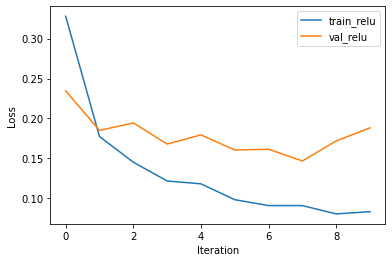

In [72]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model C
plt.plot(train_val_result['training_loss'], label = 'train_relu') 
plt.plot(train_val_result['validation_loss'], label = 'val_relu')
plt.ylabel('Loss')
plt.xlabel('Iteration')   
plt.legend()

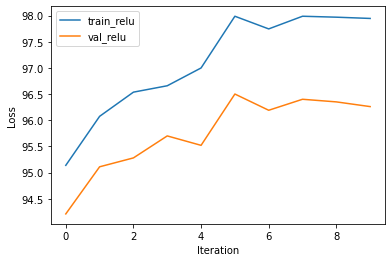

In [73]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model C
plt.plot(train_val_result['training_accuracy'], label = 'train_relu') 
plt.plot(train_val_result['validation_accuracy'], label = 'val_relu')
plt.ylabel('Loss')
plt.xlabel('Iteration')   
plt.legend()

## Choosing a Activation Function [10 marks]

Based on the best performing model you found above, define 2 more models with these 2 activation functions (1 activation function is used throughout the model definiation). Use these Activation funcitons 


*   Tanh
*   LeakyRELU

In [172]:
data_input= 28*28
H1_output= 64
H2_output=128
H3_output = 256
H4_output =512
Data_out= 10

In [168]:
# Tanh model definiton

class NetTanh(nn.Module):
    def __init__(self,data_input, H1_output, H2_output, H3_output,H4_output, Data_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(data_input, H1_output)
        self.linear2 = nn.Linear(H1_output, H2_output)
        self.linear3 = nn.Linear(H2_output, H3_output)
        self.linear4 = nn.Linear(H3_output, H4_output)
        self.linear5 = nn.Linear(H4_output, Data_out)
                           
    def forward(self, x):
        #x = x.view(-1, 28 * 28)
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = torch.tanh(self.linear3(x))
        x = torch.tanh(self.linear4(x))
        x = self.linear5(x)
        return x


# Fill in appropriately while maintaining the name of the variable
data_input= 28*28
H1_output= 64
H2_output=128
H3_output = 256
H4_output =512
Data_out= 10

# Tanh model definition


# Maintain these variable names
model_lrelu = ...
model_tanh = ...

In [176]:
class NetLeakyReLU(nn.Module):
    def __init__(self,data_input, H1_output, H2_output, H3_output,H4_output, Data_out):
        super(NetLeakyReLU, self).__init__()
        self.linear1 = nn.Linear(data_input, H1_output)
        self.linear2 = nn.Linear(H1_output, H2_output)
        self.linear3 = nn.Linear(H2_output, H3_output)
        self.linear4 = nn.Linear(H3_output, H4_output)
        self.linear5 = nn.Linear(H4_output, Data_out)
        
    def forward(self, x):
        #x = x.view(-1, 28 * 28)
        x = nn.LeakyReLU(self.linear1(x))
        x = nn.LeakyReLU(self.linear2(x))
        x = nn.LeakyReLU(self.linear3(x))
        x = nn.LeakyReLU(self.linear4(x))
        x = self.linear5(x)
        return x




In [178]:

num_epochs =10
criterion = nn.CrossEntropyLoss()
learning_rate = 0.005
modelLRelu = NetLeakyReLU(data_input, H1_output, H2_output,H3_output,H4_output, Data_out)
#model =ModelLeakyReLU()
optimizer = torch.optim.Adam(modelLRelu.parameters(), lr=learning_rate)
train_val_result = train(modelLRelu, criterion, train_loader, test_loader, optimizer, epochs=num_epochs)


TypeError: ignored

### Training 

Train these two models with the same hyperparameters. Train in separate cells given below, and report the same metrics descrived previously (train_loss, val_loss, train_acc, val_acc)

In [153]:
# Training Loop for Tanh

criterion = nn.CrossEntropyLoss()
learning_rate = 0.005
modelTanh = NetTanh(data_input, H1_output, H2_output,H3_output,H4_output, Data_out)
#modelLRelu= NetTanh()
optimizer = torch.optim.Adam(modelTanh.parameters(), lr=learning_rate)
train_val_result = train(modelTanh, criterion, train_loader, test_loader, optimizer, epochs=10)


Epoch   0. Training Loss: 0.394716,  Validation Loss: 0.286798
Training Accuracy: 46474 / 50000 [92.95%], Validation Accuracy: 9218 / 10000 [92.18%]
Epoch   1. Training Loss: 0.249737,  Validation Loss: 0.244648
Training Accuracy: 47509 / 50000 [95.02%], Validation Accuracy: 9367 / 10000 [93.67%]
Epoch   2. Training Loss: 0.214770,  Validation Loss: 0.266105
Training Accuracy: 47257 / 50000 [94.51%], Validation Accuracy: 9365 / 10000 [93.65%]
Epoch   3. Training Loss: 0.213641,  Validation Loss: 0.243754
Training Accuracy: 47545 / 50000 [95.09%], Validation Accuracy: 9414 / 10000 [94.14%]
Epoch   4. Training Loss: 0.206385,  Validation Loss: 0.296978
Training Accuracy: 47241 / 50000 [94.48%], Validation Accuracy: 9322 / 10000 [93.22%]
Epoch   5. Training Loss: 0.213713,  Validation Loss: 0.235481
Training Accuracy: 47899 / 50000 [95.80%], Validation Accuracy: 9450 / 10000 [94.50%]
Epoch   6. Training Loss: 0.213702,  Validation Loss: 0.234171
Training Accuracy: 47675 / 50000 [95.35%], 

In [156]:
# Training Loop for LeakyReLU
num_epochs =10
criterion = nn.CrossEntropyLoss()
learning_rate = 0.005
modelLRelu = NetLeakyReLU(data_input, H1_output, H2_output,H3_output,H4_output, Data_out)
#model =ModelLeakyReLU()
optimizer = torch.optim.Adam(modelLRelu.parameters(), lr=learning_rate)
train_val_result = train(modelLRelu, criterion, train_loader, test_loader, optimizer, epochs=num_epochs)


Epoch   0. Training Loss: 0.321619,  Validation Loss: 0.197272
Training Accuracy: 47768 / 50000 [95.54%], Validation Accuracy: 9466 / 10000 [94.66%]
Epoch   1. Training Loss: 0.167222,  Validation Loss: 0.183397
Training Accuracy: 48347 / 50000 [96.69%], Validation Accuracy: 9516 / 10000 [95.16%]
Epoch   2. Training Loss: 0.135961,  Validation Loss: 0.173140
Training Accuracy: 48400 / 50000 [96.80%], Validation Accuracy: 9541 / 10000 [95.41%]
Epoch   3. Training Loss: 0.116464,  Validation Loss: 0.167657
Training Accuracy: 48690 / 50000 [97.38%], Validation Accuracy: 9598 / 10000 [95.98%]
Epoch   4. Training Loss: 0.105997,  Validation Loss: 0.156977
Training Accuracy: 49013 / 50000 [98.03%], Validation Accuracy: 9632 / 10000 [96.32%]
Epoch   5. Training Loss: 0.092854,  Validation Loss: 0.143032
Training Accuracy: 49029 / 50000 [98.06%], Validation Accuracy: 9644 / 10000 [96.44%]
Epoch   6. Training Loss: 0.094652,  Validation Loss: 0.194716
Training Accuracy: 48247 / 50000 [96.49%], 

### Results on Test Set

Report the Test Set classfication accuracy for the three activation functions (ReLU, LeakyReLU & TanH) and state which activation function gave the best performance on test set

In [78]:
# Define how to calculate Accuracy on Test Set
epochs=10
for epoch in range(epochs):
  with torch.no_grad():
      t_correct = 0
      for x, y in test_loader:
          z = modelRelu(x.view(-1, 28 * 28))
          _, label = torch.max(z, 1)
          t_correct += (label == y).sum().item()
      accuracy1 = 100 * (t_correct / len(test_data))

In [79]:
# Accuracy of RELU model
epochs=10
for epoch in range(epochs):
  with torch.no_grad():
      t_correct = 0
      for x, y in test_loader:
          z = modelRelu(x.view(-1, 28 * 28))
          _, label = torch.max(z, 1)
          t_correct += (label == y).sum().item()
      accuracy1 = 100 * (t_correct / len(test_data))
print("Test Accuracy of Relu function",accuracy1)

Test Accuracy of Relu function 97.17


In [154]:
# Accuracy of TanH model
epochs=10
for epoch in range(epochs):
  with torch.no_grad():
      t_correct = 0
      for x, y in test_loader:
          z = modelTanh(x.view(-1, 28 * 28))
          _, label = torch.max(z, 1)
          t_correct += (label == y).sum().item()
      accuracy2 = 100 * (t_correct / len(test_data))
print("Test Accuracy of Tanh function",accuracy2)

Test Accuracy of Tanh function 93.64


In [157]:
# Accuracy of LeakyReLU model
epochs=10
for epoch in range(epochs):
  with torch.no_grad():
      t_correct = 0
      for x, y in test_loader:
          z = modelLRelu(x.view(-1, 28 * 28))
          _, label = torch.max(z, 1)
          t_correct += (label == y).sum().item()
      accuracy2 = 100 * (t_correct / len(test_data))
print("Test Accuracy of leakyReLU function",accuracy2)

Test Accuracy of leakyReLU function 96.71


Fill in these with the values you obtained from training.

* ReLU model Test Set Accuracy: `...97.17`.` %
* TanH model Test Set Accuracy: `.93.64...` %
* LeakReLU model Test Set Accuracy: `.96.71...` %